<a href="https://colab.research.google.com/github/zenilist/DataAnalytics/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project 2: Bikeshare Total Sale Analysis**

#Group Members:
* Yuhang Zhu
* Jason Kang
* Aviraj Kar

#Purpose

Around the world bikes are the main form of transportation for many, whether its for leisure or for work bikes are important for many to get to the destination they need. With the rise of technology bike rental companies have popped up all over the world. According to PBSC as of August 2021, there are 10 million shared bikes and 3000 bike sharing companies around the world. [link](https://www.pbsc.com/blog/2021/10/the-meddin-bike-sharing-world-map)  One such company is Capital Bikeshare a company located at Washington, DC but has their rental bikes available in many other states. This dataset focuses specifically on Capital Bikeshare’s rentals with attributes that pertain to the weather, number of total users renting, temperature, and many more. Our goal of this project is to determine what attributes affect how many total users Capital Bikeshare gets.

# Data Summary
- **Month** : Month of the year
- **Season** : season (1:winter, 2:spring, 3:summer, 4:fall)
- **Hour** : hour (0 to 23)
- **Holiday** : weather day is holiday or not 
- **Day of the Week** : day of the week
- **Working Day** : if day is neither weekend nor holiday is 1, otherwise is 0.
- **Weather Type** :
 1.  Clear, Few clouds, Partly cloudy, Partly cloudy
 2.  Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
 3.  Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **Temperature F** : Temperature in Fahrenheit 
- **Temperature Feels F**: Feeling temperature in fahrenheit
- **Humidity**: Normalized humidity. The values are divided to 100 (max)
- **Wind speed**: Normalized wind speed. The values are divided to 67 (max)
- **Casual Users**: count of casual users
- **Registered Users**: count of registered users
- **Total Users**: count of total rental bikes including both casual and registered

In [ ]:
#import required python libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import (model_selection,preprocessing)
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#supress python warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#https://data.world/data-society/capital-bikeshare-2011-2012/activity
#load the video game sales dataset from github repository
df = pd.read_csv('https://raw.githubusercontent.com/Skyfallup/Summer-CSCI381-11/main/bike_data_revised_.csv')
cp_df = df.copy()
#check the headers of the dataset
df.head()

,Month,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,1,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,1,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,1,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,1,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,1,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


In [ ]:
#show statistics of all the attributes
df.describe()

,Month,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,6.537775,2.485241,11.546752,0.028770,3.003683,0.682721,1.425283,58.777507,59.722009,62.722884,12.736233,35.676218,153.786869,189.463088
std,3.438776,1.115985,6.914405,0.167165,2.005771,0.465431,0.639357,16.620757,20.415345,19.292983,8.196891,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.600000,3.200000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,45.200000,42.800000,48.000000,7.000000,4.000000,34.000000,40.000000
50%,7.000000,2.000000,12.000000,0.000000,3.000000,1.000000,1.000000,59.000000,60.800000,63.000000,13.000000,17.000000,115.000000,142.000000
75%,10.000000,3.000000,18.000000,0.000000,5.000000,1.000000,2.000000,72.800000,77.000000,78.000000,17.000000,48.000000,220.000000,281.000000
max,12.000000,4.000000,23.000000,1.000000,6.000000,1.000000,4.000000,102.200000,122.000000,100.000000,57.000000,367.000000,886.000000,977.000000


In [ ]:
#show dimensions of the dataset
df.shape

(17379, 14)

In [ ]:
#show unique values of each feature
df.nunique()

Month                   12
Season                   4
Hour                    24
Holiday                  2
Day of the Week          7
Working Day              2
Weather Type             4
Temperature F           50
Temperature Feels F     65
Humidity                89
Wind Speed              30
Casual Users           322
Registered Users       776
Total Users            869
dtype: int64

In [ ]:
#show datatypes
df.dtypes

Month                    int64
Season                   int64
Hour                     int64
Holiday                  int64
Day of the Week          int64
Working Day              int64
Weather Type             int64
Temperature F          float64
Temperature Feels F    float64
Humidity                 int64
Wind Speed               int64
Casual Users             int64
Registered Users         int64
Total Users              int64
dtype: object

All of the features in our workflow are numeric that consists of 2 continuous and 11 discrete. The target variable is Total Users.

In [ ]:
# to see if there is nan in columns
df.isnull().sum()

Month                  0
Season                 0
Hour                   0
Holiday                0
Day of the Week        0
Working Day            0
Weather Type           0
Temperature F          0
Temperature Feels F    0
Humidity               0
Wind Speed             0
Casual Users           0
Registered Users       0
Total Users            0
dtype: int64

In [ ]:
# see new panda frame
df.head()

,Month,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,1,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,1,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,1,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,1,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,1,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


#**Exploratory Data Analysis**

In [ ]:
#create a function to define graph size
def make_size(x = 15,y = 10):
  plt.figure(figsize=(x,y))

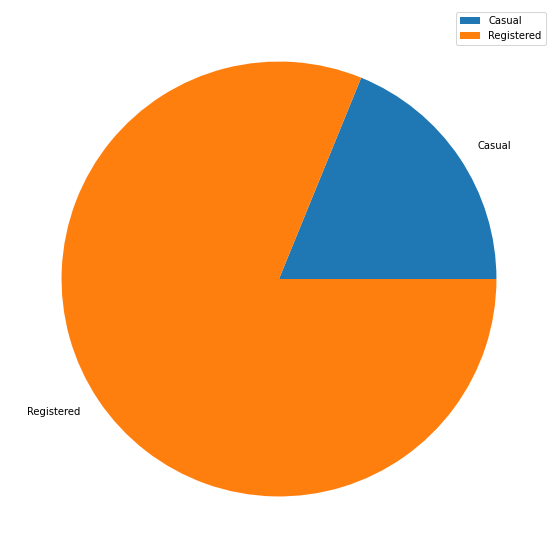

In [ ]:

#create three python variables to store the sum of the two types of bike users and calculate their percentage
casual = df['Casual Users'].sum()
registered = df['Registered Users'].sum()
total = df['Total Users'].sum()
tag =['Casual','Registered']
percent = [casual/ total,registered/total]
# display the proportion of casual and registered bike users 
make_size()
plt.pie(percent,labels = tag)
plt.legend()

About 20% of the users are casual which indicates that the company has a steady growth rate and has good potential to turn that userbase into future subscribers.

(array([ 5514.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 11865.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

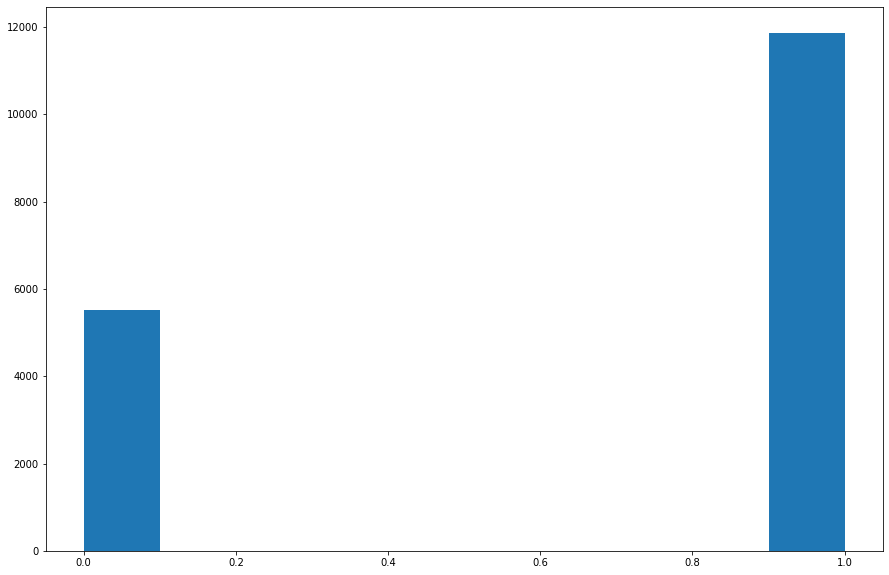

In [ ]:
#display the breakdown of purchases with respect to holiday(0) and working day(1) 
make_size()
plt.hist(df['Working Day'])

More than half of the userbase use the bikeshare service during the weekdays. This might indicate that people might use the bike to commute.

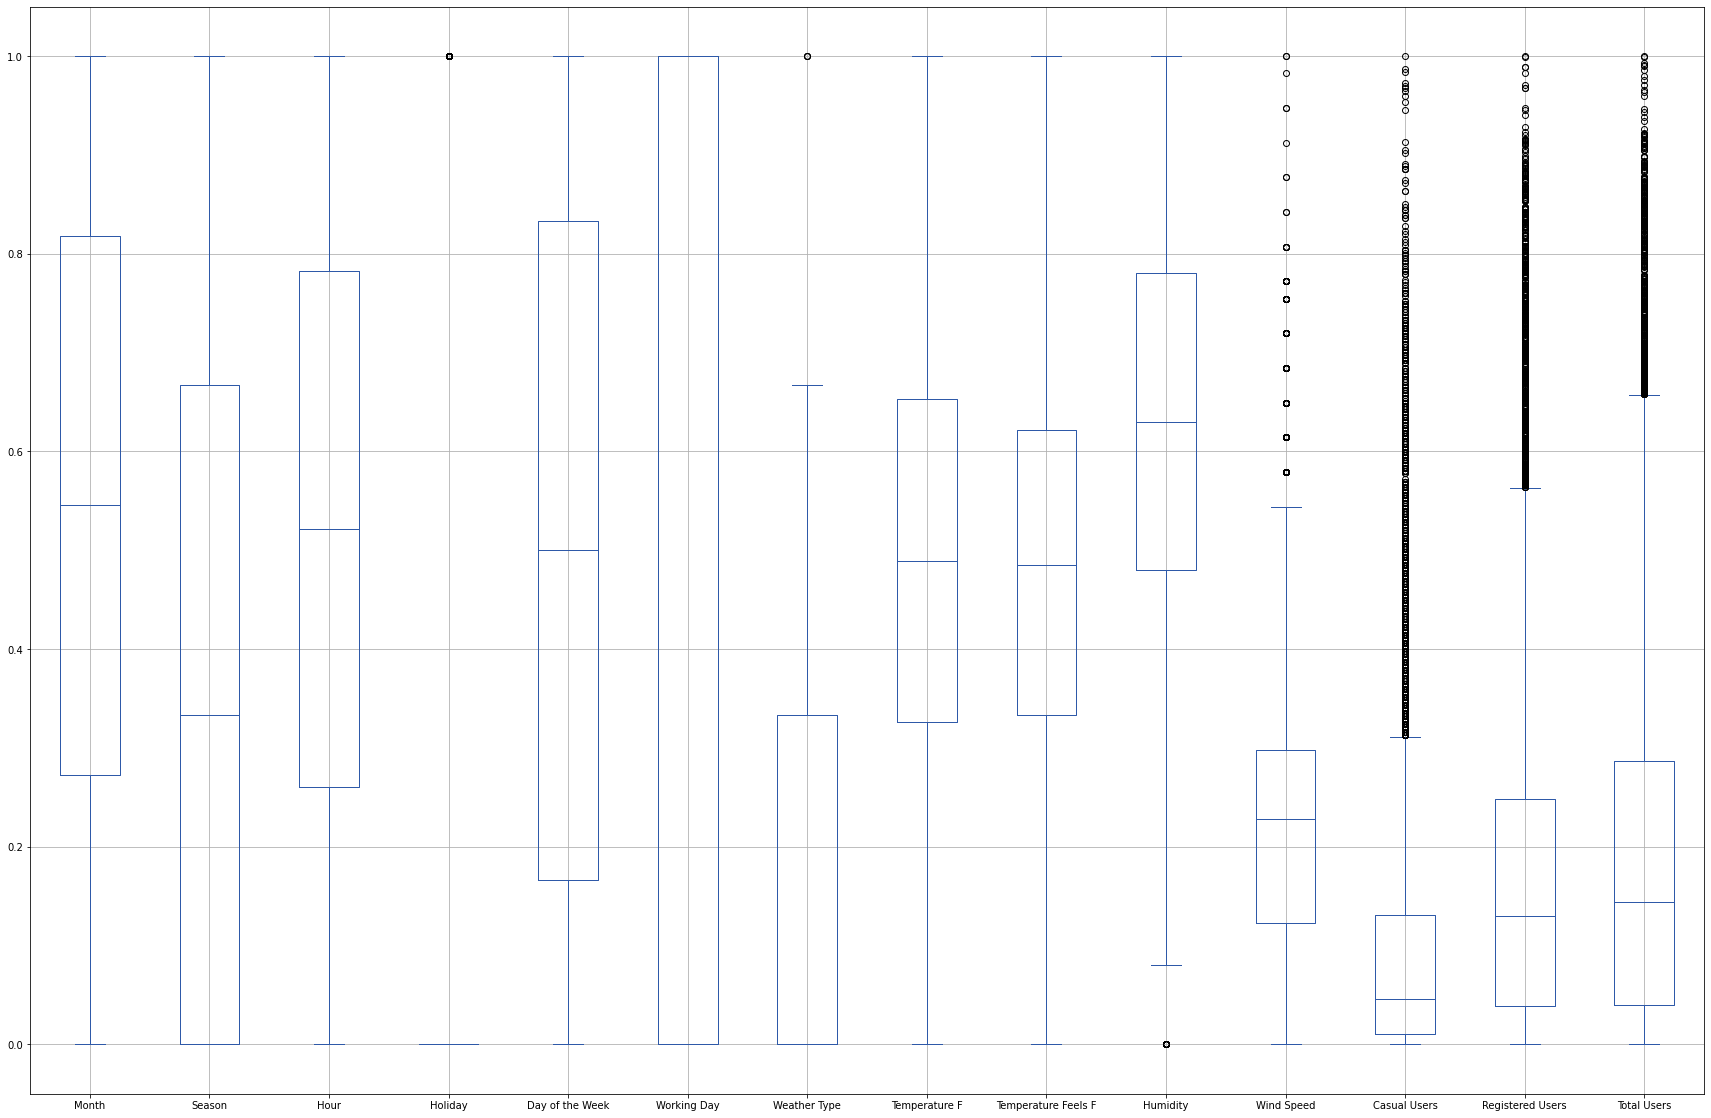

In [ ]:
# boxplot after data transformation
n_outlier= (df-df.min())/(df.max()-df.min())
n_outlier.boxplot(figsize=(30,20), color='#2e59a8')

Apart from the target variables(casual users, registered users and total users), there are not many unexpected outliers in this dataset. The region(s) from which this data has been sourced has more humid days in a given and a few days where it is dry. Also, the region(s) only get a couple windy days.  

##**Change over time**

<BarContainer object of 12 artists>

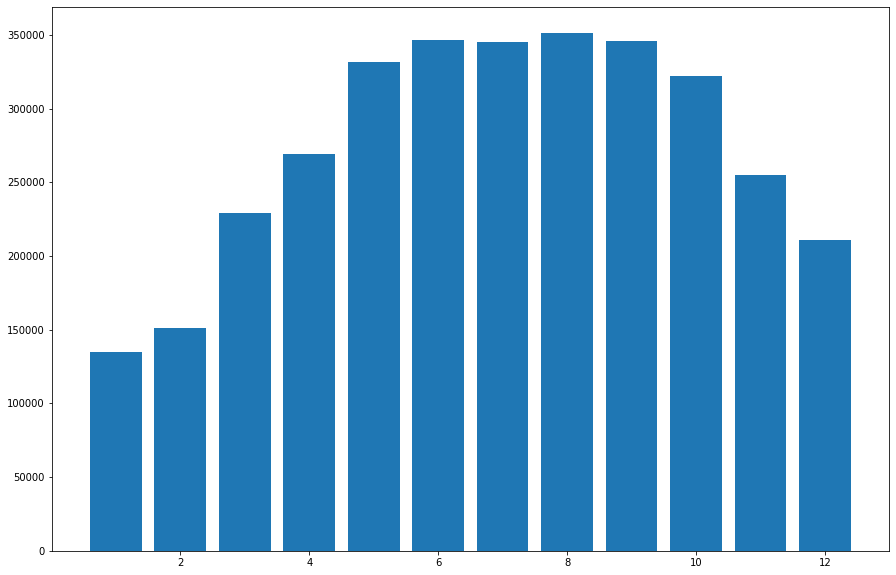

In [ ]:
import collections

#create a dictionary to map month(key) and count of users(value)
mapping = collections.defaultdict(int)

for month,val in zip(df['Month'].tolist(),df['Total Users'].tolist()):
    mapping[month] += val

#display bar graph
make_size(15,10)
plt.bar(mapping.keys(),mapping.values())


Bike sales starts increasing during the months of spring and hits peak during the summer months and then it starts to slowly decrease in fall, and finally hits rock bottom in january. All these observations look very reasonable that bolster the integrity of the dataset.

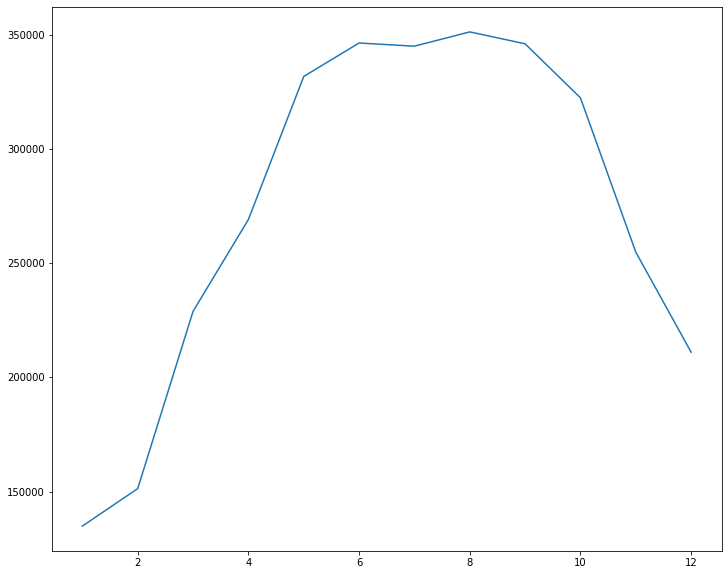

In [ ]:
make_size(12,10)
plt.plot(list(mapping.keys()),list(mapping.values()))


In [ ]:
df.corr()

,Month,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
Month,1.000000,0.214783,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201731,0.208102,0.164411,-0.135387,0.068457,0.122273,0.120638
Season,0.214783,1.000000,0.004931,0.055948,-0.003163,-0.036159,0.040452,-0.470806,-0.469271,0.014750,-0.038742,-0.227260,-0.099586,-0.144872
Hour,-0.005772,0.004931,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137626,0.133758,-0.276498,0.137253,0.301202,0.374141,0.394071
Holiday,0.018430,0.055948,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027356,-0.030975,-0.010588,0.003985,0.031564,-0.047345,-0.030927
Day of the Week,0.010400,-0.003163,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001806,-0.008817,-0.037158,0.011504,0.032721,0.021578,0.026900
Working Day,-0.003477,-0.036159,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055396,0.054665,0.015688,-0.011831,-0.300942,0.134326,0.030284
Weather Type,0.005400,0.040452,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102601,-0.105571,0.418130,0.026226,-0.152628,-0.120966,-0.142426
Temperature F,0.201731,-0.470806,0.137626,-0.027356,-0.001806,0.055396,-0.102601,1.000000,0.987677,-0.069890,-0.023115,0.459626,0.335373,0.404785
Temperature Feels F,0.208102,-0.469271,0.133758,-0.030975,-0.008817,0.054665,-0.105571,0.987677,1.000000,-0.051936,-0.062326,0.454089,0.332566,0.400938
Humidity,0.164411,0.014750,-0.276498,-0.010588,-0.037158,0.015688,0.418130,-0.069890,-0.051936,1.000000,-0.290109,-0.347028,-0.273933,-0.322911


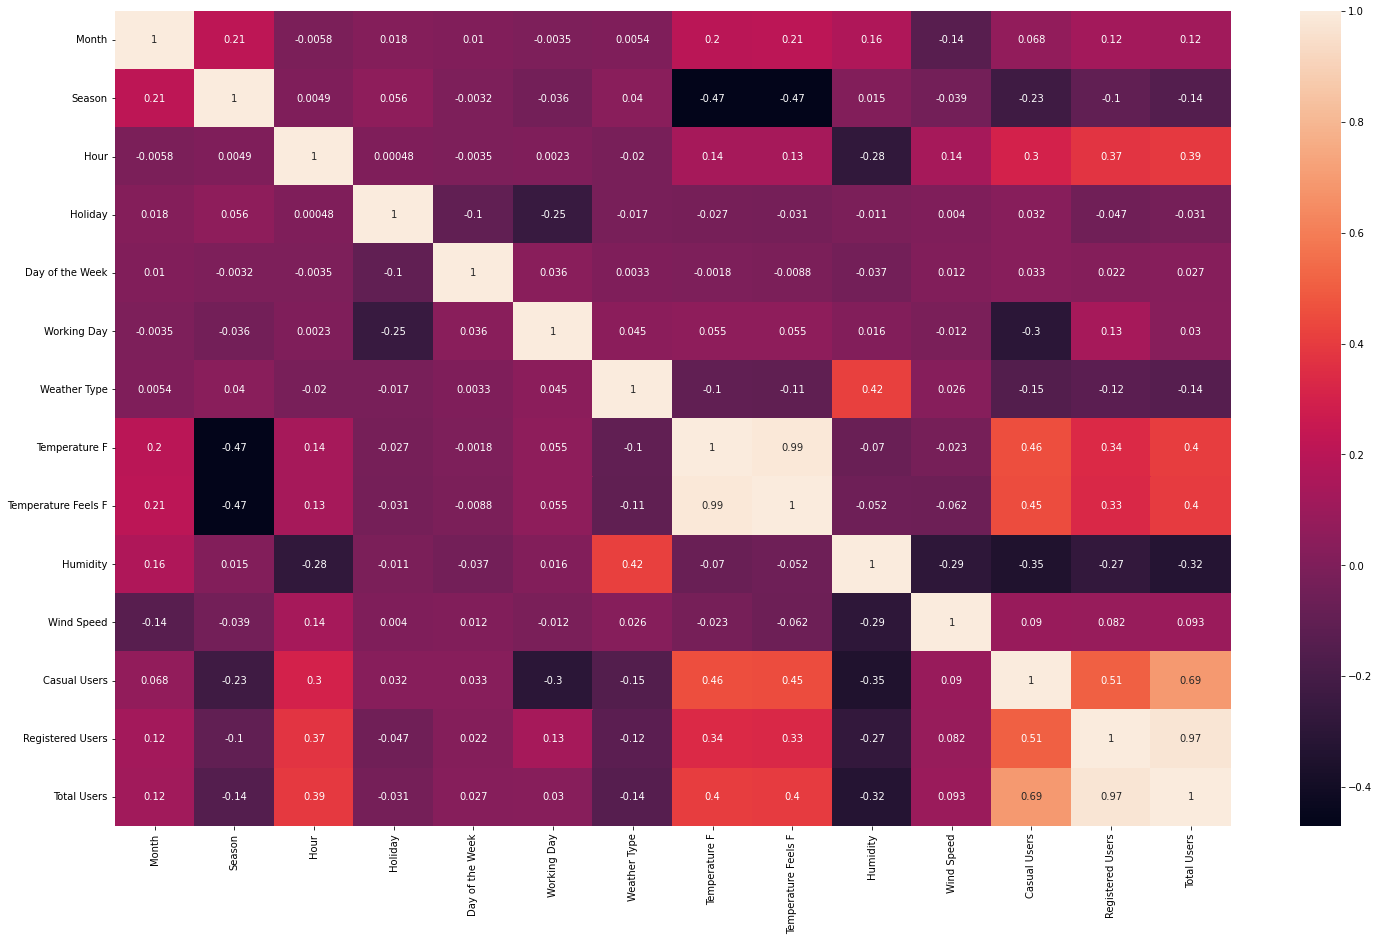

In [ ]:
#create heatmap to display correlation
make_size(25,15)
sns.heatmap(df.corr(),annot=True)

#**Feature Engineering**

##**Data Scaling**

We decided to scale the entire dataset and make all the features have the same range since we are doing the linear regression and Support Vector Machine models.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = df.columns
for col in cols:
    df[col] = scaler.fit_transform(df[col].to_numpy().reshape(-1, 1))

df.head()

,Month,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,0.0,1.0,0.000000,0.0,1.0,0.0,0.0,0.224586,0.287879,0.81,0.0,0.008174,0.014673,0.015369
1,0.0,1.0,0.043478,0.0,1.0,0.0,0.0,0.204492,0.272727,0.80,0.0,0.021798,0.036117,0.039959
2,0.0,1.0,0.086957,0.0,1.0,0.0,0.0,0.204492,0.272727,0.80,0.0,0.013624,0.030474,0.031762
3,0.0,1.0,0.130435,0.0,1.0,0.0,0.0,0.224586,0.287879,0.75,0.0,0.008174,0.011287,0.012295
4,0.0,1.0,0.173913,0.0,1.0,0.0,0.0,0.224586,0.287879,0.75,0.0,0.000000,0.001129,0.000000


##**Dimensionality Reduction**

Using our correlation graph in the above section, we came to conclusion that season and month have a high correlation of .21, and as a result give rise to the multicollinearity problem. So, we decided to remove it from the dataset to reduce some of the dimesions. By the same logic we also removed temperature F. For the features - Registered Users and Casual Users, they are two parts of Total users and as such are not an independant variable, so we remove them from the dataset. 

In [ ]:
# drops the aforementioned columns from the dataframe
df.drop('Season',axis = 1, inplace = True)
df.drop('Temperature F',axis = 1, inplace = True)
df.drop('Registered Users',axis = 1, inplace = True)
df.drop('Casual Users',axis = 1, inplace = True)

df.head()

,Month,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature Feels F,Humidity,Wind Speed,Total Users
0,0.0,0.000000,0.0,1.0,0.0,0.0,0.287879,0.81,0.0,0.015369
1,0.0,0.043478,0.0,1.0,0.0,0.0,0.272727,0.80,0.0,0.039959
2,0.0,0.086957,0.0,1.0,0.0,0.0,0.272727,0.80,0.0,0.031762
3,0.0,0.130435,0.0,1.0,0.0,0.0,0.287879,0.75,0.0,0.012295
4,0.0,0.173913,0.0,1.0,0.0,0.0,0.287879,0.75,0.0,0.000000


##**Feature Selection**

In [ ]:
# select k best
#importing libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#declaring target as Total Users column
target = df['Total Users']
#dropping Total Users from the features
features = df.drop(['Total Users'],axis = 1).copy()
#fitting the columns into their respective positions
select_kbest = SelectKBest(f_regression,k = 5).fit(features,target)
features_kbest = select_kbest.get_support()
#printing results from kbest
print('chosen features: ', features.columns[features_kbest],'\n')

select_kbest.scores_

chosen features:  Index(['Month', 'Hour', 'Weather Type', 'Temperature Feels F', 'Humidity'], dtype='object') 



array([ 256.63049815, 3194.6142202 ,   16.63698048,   12.58314527,
         15.95182279,  359.79450956, 3328.41713713, 2022.84830548,
        152.39215152])

In [ ]:
# print out score for each independent variable in sorted order
scores = pd.DataFrame({'Feature Name':features.columns,'Score':select_kbest.scores_}).sort_values(by='Score',ascending=False)
print(scores)

          Feature Name        Score
6  Temperature Feels F  3328.417137
1                 Hour  3194.614220
7             Humidity  2022.848305
5         Weather Type   359.794510
0                Month   256.630498
8           Wind Speed   152.392152
2              Holiday    16.636980
4          Working Day    15.951823
3      Day of the Week    12.583145


In [ ]:
# Recursive Feature Elimination
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(estimator = lr, n_features_to_select = 5 , step = 1)

rfe.fit(features,target)
rfe_features = features.columns[rfe.support_]
print(rfe_features)

Index(['Month', 'Hour', 'Holiday', 'Temperature Feels F', 'Humidity'], dtype='object')


#**Model #1 - SVM - w/ 3 selected features**

In [ ]:
# svm model 3 features
from sklearn import svm
#declaring the target
y = df['Total Users']
#declaring the features
X = df[['Temperature Feels F', 'Hour', 'Weather Type']]
#our test and train split for prediction
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25)
#instance for our svm
clf = svm.SVR()
#fitting our model
clf.fit(X_train,y_train)
clf.score(X,y)

0.5657589624501367

#**Model #2 - Linear Regression w/ 3 Selected Features**

In [ ]:
# linear regression model with 3 features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#declaring our features and target
#our target
y = df['Total Users']
#our features
X = df[['Temperature Feels F', 'Hour', 'Weather Type']]
#our test and train split for prediction
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(X,y)

0.2884605408679307

#**Model #3 - Tree Regressor w/ 3 selected features**

In [ ]:
# decision tree regression model with 3 features
from sklearn.tree import DecisionTreeRegressor 
#we create the regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
#fit the regressor with our x and y data
model=DecisionTreeRegressor().fit(x_train,y_train)
#test the output
y_pred=model.predict(x_test)
#score the model we made
model.score(X,y)

0.7079557140215375

#**Model #4 - SVM w/ 5 features**

In [ ]:
# svm model with different features, 5 features
from sklearn import svm
#our target
y = df['Total Users']
#our features with more features added from before Holiday and Humidity
X = df[['Temperature Feels F', 'Hour', 'Weather Type','Holiday','Humidity']]
#our test and train split for prediction
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25)
#instance for our svm
clf = svm.SVR()
#fitting our model
clf.fit(X_train,y_train)

#score of our model
clf.score(X,y)


0.5408403901119021

#**Model #5 - Linear Regession w/ 5 features**

In [ ]:
# linear regression model with different features, 5 features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#our test and train split for prediction
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)
#declaring our LinearRegression model
model = LinearRegression().fit(x_train, y_train)
#fitting our model
y_pred = model.predict(x_test)
#score of our model
model.score(X,y)

0.3264331998121581

#**Model #6 - Tree Regressor w/ 5 features**

In [ ]:
# decision tree regression model with different features, 5 features
from sklearn.tree import DecisionTreeRegressor 
#we create the regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
#fit the regressor with our x and y data
model=DecisionTreeRegressor().fit(x_train,y_train)
#test the output
y_pred=model.predict(x_test)
#score the model we made
model.score(X,y)

0.8091082637599146

#**Model #7 - SVM w/ 6 features**

In [ ]:
# svm model with different features, 6 features
from sklearn import svm
#our target
y = df['Total Users']
#our features with more features added from before now Month is added 
X = df[['Temperature Feels F', 'Hour', 'Weather Type','Humidity','Month','Holiday']]
#our test and train split for prediction
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .25)
#instance for our svm
clf = svm.SVR()
#fitting our model
clf.fit(X_train,y_train)
# check model score
clf.score(X,y)

0.5451549014592192

#**Model #8 - Linear Regressor w/ 6 features**

In [ ]:
# linear regression model with different features, 5 features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#our test and train split for prediction
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# fitting our model
model = LinearRegression().fit(x_train, y_train)
# model prediction by using x_test data
y_pred = model.predict(x_test)

# check model score
model.score(X,y)

0.33457939138263515

In [ ]:
r2_score(y_test, y_pred)
#weak r^2 was received 

0.3239575518466281

#**Model #4 - Tree Regressor w/ 6 features**

In [ ]:
# decision tree regression model with different features, 6 features
from sklearn.tree import DecisionTreeRegressor 
# instance of decisiontree regression
regressor = DecisionTreeRegressor(random_state = 0) 
# fitting our model
model=DecisionTreeRegressor().fit(x_train,y_train)
# model prediction by using x_test data
y_pred=model.predict(x_test)
#check model score
model.score(X,y)

0.859555460122109

In [ ]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)

0.047899590163934413

#**Conclusion**

* Through our analysis of different models we have decided upon the Decision Tree Regression Model as it scored the highest out of all the 3 models we tested. 
* We also decided to include 6 features instead of our original 3 as it impacted our model’s score positively. 
* A interesting note was the score of our Linear Regression model and how poorly it placed. It may suggest that there is a lot of noise in our data. Another point to look at would be our poorly scored r^2 score and could be another culprit of our low Linear Regression model’s score.

#**Reference**
* https://www.geeksforgeeks.org/learning-model-building-scikit-learn-python-machine-learning-library/

* https://scikit-learn.org/stable/
* https://data.world/data-society/capital-bikeshare-2011-2012